In [5]:
import sys
import os
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from XCrystal import *
import time

In [6]:
Npoints = 50
delta_theta = 0.0
omega0 = 9000
omegas = np.linspace(8999.8, 9000.6, Npoints)  
#omegas = np.linspace(8998.8, 9001.6, Npoints)  

Rs = np.zeros(Npoints)
Ts = np.zeros(Npoints)

In [7]:
def single_realization(delta_theta, omega):
    
    xcr = XCrystal(XCr_path+'/config/Si400_9keV.yaml', omega)
    xcr.configure(delta_theta)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission

def single_realization_with_data(delta_theta, omega):
    
    xcr = XCrystal(XCr_path+'/config/Si400_9keV.yaml', omega)
    xcr.configure(delta_theta)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission, xcr.U1_field, xcr.U2_field

In [8]:
U1_data = []
U2_data = []

for i in range(0, Npoints):
    Rs[i], Ts[i], U1_xyz, U2_xyz = single_realization_with_data(delta_theta, omegas[i])
    U1_data.append(U1_xyz)
    U2_data.append(U2_xyz)

U1_xyz = np.asarray(U1_data)
U2_xyz = np.asarray(U2_data)

Delta theta:  0.0 ; Reflectivity:  0.020658820541440855 ; Transmission:  0.4346125626308107
Delta theta:  0.0 ; Reflectivity:  0.03816909366599038 ; Transmission:  0.4303938704635024
Delta theta:  0.0 ; Reflectivity:  0.015093738423018557 ; Transmission:  0.44434681044893676
Delta theta:  0.0 ; Reflectivity:  0.01773506327739535 ; Transmission:  0.4461057117859603
Delta theta:  0.0 ; Reflectivity:  0.05041481548132551 ; Transmission:  0.43533173332735525
Delta theta:  0.0 ; Reflectivity:  0.033008154932552373 ; Transmission:  0.44819278043102323
Delta theta:  0.0 ; Reflectivity:  0.013139490176568392 ; Transmission:  0.4613356232704207
Delta theta:  0.0 ; Reflectivity:  0.05774623055445796 ; Transmission:  0.4449775670296451
Delta theta:  0.0 ; Reflectivity:  0.07098250033807664 ; Transmission:  0.44503788682107387
Delta theta:  0.0 ; Reflectivity:  0.02396696658075768 ; Transmission:  0.4736152456808998
Delta theta:  0.0 ; Reflectivity:  0.041578178087334675 ; Transmission:  0.4702841

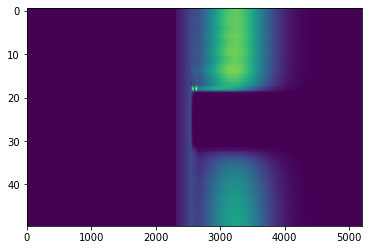

In [10]:
plt.imshow(np.abs(U2_xyz[:,:,0,-1]), aspect='auto')

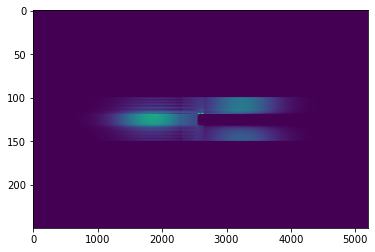

In [17]:
pad_shape = [(100,100), (0,0), (0,0), (0,0)]
utt1 = np.pad(U1_xyz, pad_shape, mode='constant', constant_values=(0.0 + 1j * 0.0, 0.0 + 1j * 0.0))
utt2= np.pad(U2_xyz, pad_shape, mode='constant', constant_values=(0.0 + 1j * 0.0, 0.0 + 1j * 0.0))
plt.imshow(np.abs(utt1[:,:,0,-1])+np.abs(utt2[:,:,0,-1]), aspect='auto')

In [22]:
U2_txyz = np.fft.fftshift(np.fft.ifft(utt1[:,:,0,-1]+utt2[:,:,0,-1], axis=0), axes=0)

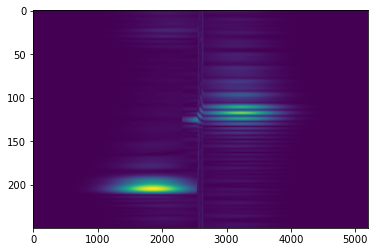

In [23]:
plt.imshow(np.abs(U2_txyz[:,:]), aspect='auto')

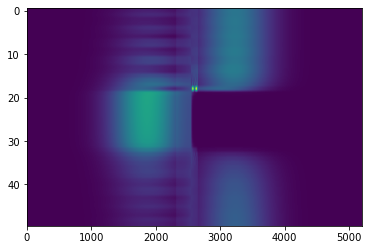

In [27]:
plt.imshow(np.abs(U2_xyz[:,:,0,-1])+np.abs(U1_xyz[:,:,0,-1]), aspect='auto')

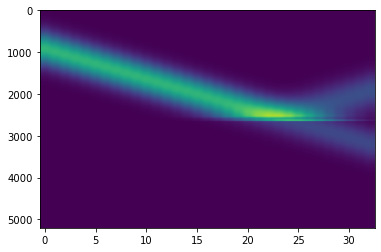

In [28]:
plt.imshow(np.abs(U1_xyz[17,:,0,:])**2+np.abs(U2_xyz[17,:,0,:] )**2, aspect='auto')

In [33]:
# for i in range(0, Npoints):
#     plt.figure()
#     plt.imshow(np.abs(data[i])[:,5,:], aspect='auto')
#     plt.colorbar()

In [34]:
#for i in range(0, Npoints):
#   Rs[i], Ts[i] = single_realization(delta_theta, omegas[i])

In [35]:
matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['legend.fontsize'] = 20

In [36]:
XOPfile = 'Si4009keVThickness50um'
XOPdata = np.loadtxt(XOPfile)

Text(0, 0.5, 'R')

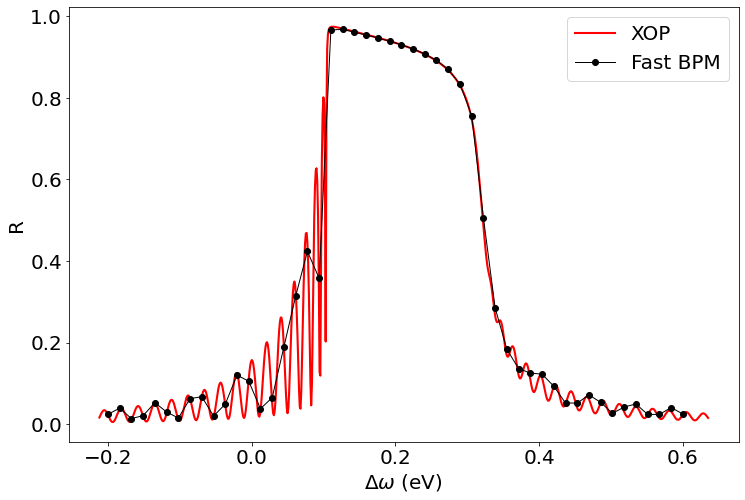

In [37]:
alphaB = 0.5320738025797507
dw = XOPdata[:,0]*4.848137 * 1e-6 * omega0 / np.tan(alphaB)

plt.plot(dw, XOPdata[:,1], '-', linewidth=2.1, color='red', label='XOP')
plt.plot(omegas - omega0, Rs, 'o-', linewidth=1.0, color='black', label='Fast BPM')

plt.legend()
plt.xlabel(r'$\Delta \omega$ (eV)')
plt.ylabel('R')